## 数据增强(Data Augmentaion)

使用 ImageDataGenerator 来设置数据增强
* rotation_range 是角度值(在 0~180 范围内)，表示图像随机旋转的角度范围。
* width_shift 和 height_shift 是图像在水平或垂直方向上平移的范围(相对于总宽
度或总高度的比例)。
* shear_range 是随机错切变换的角度。
* zoom_range 是图像随机缩放的范围。
* horizontal_flip 是随机将一半图像水平翻转。如果没有水平不对称的假设(比如真
实世界的图像)，这种做法是有意义的。
* fill_mode 是用于填充新创建像素的方法，这些新像素可能来自于旋转或宽度 / 高度平移。 我们来看一下增强后的图像(见图 5-11)。

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

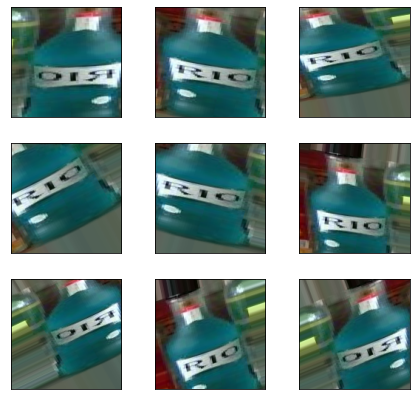

In [2]:
from tensorflow.keras.preprocessing import image

import os
import matplotlib.pyplot as plt

train_dataset_path = "data/train/"

train_rio_dir = f"{train_dataset_path}RIO蓝"
fnames = [f'{train_rio_dir}/{fname}'
          for fname in os.listdir(train_rio_dir)]

img_path = fnames[0]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

# 绘制9张随机增强后的图像
fig = plt.figure(figsize=(6,6))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.subplot(3,3, i+1)
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(image.array_to_img(batch[0]))    
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
    if i == 8:
        break

plt.show()